# Exercise 4: Conditional Agents

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation1: str
    num3: int
    num4: int
    operation2: str
    final_num1: int
    final_num2: int

In [3]:
def add_node1(state:AgentState) -> AgentState:
    """This node will add two numbers based on the operation provided"""
    state["final_num1"] = state["num1"] + state["num2"]
    return state

def add_node2(state:AgentState) -> AgentState:
    """This node will add two numbers based on the operation provided"""
    state["final_num2"] = state["num3"] + state["num4"]
    return state

def subtract_node1(state:AgentState) -> AgentState:
    """This node will subtract two numbers based on the operation provided"""
    state["final_num1"] = state["num1"] - state["num2"]
    return state

def subtract_node2(state:AgentState) -> AgentState:
    """This node will subtract two numbers based on the operation provided"""
    state["final_num2"] = state["num3"] - state["num4"]
    return state

def decider1(state:AgentState) -> str:
    """This node will decide which operation to perform based on the operation1 value"""
    if state["operation1"] == "+":
        return "addition_operation1"
    elif state["operation1"] == "-":
        return "subtraction_operation1"

def decider2(state:AgentState) -> str:
    """This node will decide which operation to perform based on the operation2 value"""
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"


In [9]:
graph = StateGraph(AgentState)

graph.add_node("router1", lambda state: state) # pass-through node
graph.add_node("add_node1", add_node1)
graph.add_node("subtract_node1", subtract_node1)
graph.add_node("router2", lambda state: state) # pass-through node
graph.add_node("add_node2", add_node2)
graph.add_node("subtract_node2", subtract_node2)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decider1,
    {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "subtract_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decider2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

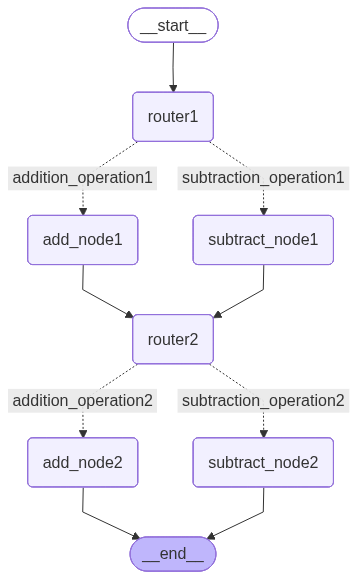

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
initial_state: AgentState = {
    "num1": 10,
    "num2": 5,
    "operation1": "-",
    "num3": 20,
    "num4": 8,
    "operation2": "+"
}

result = app.invoke(initial_state)
print(result)
print(f"Final Result after first operation: {result['final_num1']} and second operation: {result['final_num2']}")

{'num1': 10, 'num2': 5, 'operation1': '-', 'num3': 20, 'num4': 8, 'operation2': '+', 'final_num1': 5, 'final_num2': 28}
Final Result after first operation: 5 and second operation: 28
